In [1]:
import warnings
warnings.filterwarnings("ignore")

from prop_comparison_methods import *

In [2]:
#first we select the genotype 
genotype = 'ecadGFPnbG4'
#genotype = 'ecadGFPnbG4myoVI'

In [3]:
#some lists and dicts that we refer to later

#update names of devstages
devstage_map = {
                "96hAEL":"96hAEL",
                "120hAEL":"120hAEL",
                "upcrawling":"wL3",
                "whitePupa":"0hAPF",
                "2hAPF":"2hAPF",
                "4hAPF":"4hAPF",
                "6hAPF":"6hAPF",
               }

#declare colors for each devstage and crosssection and region
color_dict = {
              '96hAEL':'#f1ef81',
              '120hAEL':'#efa636',
              'wL3':'#414243',
              '0hAPF':'#7d99cd', 
              '2hAPF':'#64a9dd', 
              '4hAPF':'#78cfdb',
              '6hAPF':'#71c382',
              'DV' : 'purple',
              'outDV' : 'green',
             }

columns = ['devstage', 'discName', 'region', 'k_dist', 'roi',
           'area','neighbour_number','elongation_tensor_norm_max', 
           'Qrr_geom_inPlane', 'Qphiphi', 'Qnn', 'Qrphi', 'Qrn', 'Qphin',
           'countInBin', 'cumcount',
           'k_dist_pathlength', #'k_dist_pathlength_poly' 
          ]

rois = ['outDV', 'DV']
devstages = [#"96hAEL",
             "wL3","0hAPF","2hAPF","4hAPF", "6hAPF",
]

############################################
# Dictionary of pairs of stages to compare #
############################################

#for the simulations, we use the cumulative version
devstage_combinations = pd.DataFrame({'devstage_init':[
                                                       'wL3','0hAPF','2hAPF', '4hAPF' #diff between consecutive stages
                                                       #'wL3','wL3','wL3', #'wL3' #cumulative
                                                      ],
                                     'devstage_final':[
                                                       '0hAPF','2hAPF','4hAPF', '6hAPF'
                                                      ],}
                                    )

In [4]:
#upload data
#df = pd.read_pickle('../data/DFallDiscsIncreaselimitcounts.pkl')
df = pd.read_pickle('../data/DFallDiscslimitcounts.pkl')
#df = df[df['genotype'] == 'ecadGFPnbG4']
df = df[df['genotype'] == genotype]
df["devstage"] = [devstage_map[x] for x in df["devstage"].values]
df = df[columns]


In [5]:
df.head(3)

,devstage,discName,region,k_dist,roi,area,neighbour_number,elongation_tensor_norm_max,Qrr_geom_inPlane,Qphiphi,Qnn,Qrphi,Qrn,Qphin,countInBin,cumcount,k_dist_pathlength
0,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8_outDV,outDV,13,dorsal,1.646873,4,0.079496,-0.065859,0.056459,0.009400,0.031090,0.003897,0.033033,42.0,288.0,28.560460
1,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8_outDV,outDV,13,dorsal,6.991516,7,0.297667,-0.280260,0.288938,-0.008678,-0.057726,-0.009983,0.029122,42.0,288.0,31.961953
2,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8_outDV,outDV,13,dorsal,9.529885,6,0.178425,-0.039228,0.051418,-0.012190,-0.165394,-0.004449,0.012512,42.0,288.0,32.296625


### For each disc, compute average quantities within each ring

In [6]:
#discName contains the name of the disc as well as region
groupby_cols = ['devstage', 'region', 'discName', 'k_dist']
#here we pool cells within a ring and calculate the mean
df_pool_k = df.groupby(groupby_cols).agg('mean').reset_index() 
#we offset k_dist values if the rings do not start with k_dits = 0
k_dist_offset = df.groupby(['discName']).k_dist.agg('min')#.reset_index().set_index('discName') #some discs can have k starting from non-zero value, so we offset them by the starting k
df_pool_k['k_dist'] = df_pool_k['k_dist'] - k_dist_offset[df_pool_k['discName'].values].values #offsetting k values


#scale pathlength
pathlength_max = df_pool_k.groupby(['discName']).k_dist_pathlength.agg('max')
df_pool_k['pathlength_scaled'] = df_pool_k['k_dist_pathlength']/pathlength_max[df_pool_k['discName'].values].values

In [7]:
df_pool_k.head()

,devstage,region,discName,k_dist,area,neighbour_number,elongation_tensor_norm_max,Qrr_geom_inPlane,Qphiphi,Qnn,Qrphi,Qrn,Qphin,countInBin,cumcount,k_dist_pathlength,pathlength_scaled
0,0hAPF,DV,20201022_ecadGFPnbG4_whitepupa_disc1_DV,0,7.046083,4.666667,0.277725,-0.025823,0.026297,-0.000474,0.225422,0.006824,0.002120,3.0,3.0,0.000000,0.000000
1,0hAPF,DV,20201022_ecadGFPnbG4_whitepupa_disc1_DV,1,8.485620,5.800000,0.191811,-0.099231,0.100169,-0.000937,0.087789,-0.000811,-0.001059,5.0,8.0,2.880560,0.033616
2,0hAPF,DV,20201022_ecadGFPnbG4_whitepupa_disc1_DV,2,6.974827,6.250000,0.233407,-0.029457,0.029898,-0.000441,0.118729,-0.001962,0.000164,8.0,16.0,6.077616,0.070925
3,0hAPF,DV,20201022_ecadGFPnbG4_whitepupa_disc1_DV,3,6.514719,5.700000,0.222431,0.032543,-0.031381,-0.001163,-0.035350,-0.002401,-0.001514,10.0,26.0,9.901794,0.115553
4,0hAPF,DV,20201022_ecadGFPnbG4_whitepupa_disc1_DV,4,7.618575,6.125000,0.233202,0.078570,-0.076815,-0.001755,-0.061113,-0.003959,-0.000920,8.0,34.0,13.259157,0.154734


In [8]:
#compute Qnorm and exponential of Qnorm - to be used later

#function to compute area weighted average
wm = lambda x: np.average(x, weights=df.loc[x.index, "area"])

df_pool_areaWeighted_k = df.groupby(groupby_cols).agg(Qrr_geom_inPlane = pd.NamedAgg(column = 'Qrr_geom_inPlane', aggfunc = wm),
                                                      Qrphi = pd.NamedAgg(column = 'Qrphi', aggfunc = wm),
                                                      Qphiphi = pd.NamedAgg(column = 'Qphiphi', aggfunc = wm),
                                                     ).reset_index() 
df_pool_k[["Qrr_geom_inPlane", "Qrphi", "Qphiphi"]] = df_pool_areaWeighted_k[["Qrr_geom_inPlane", "Qrphi", "Qphiphi"]]

df_pool_k['Qnorm'] = np.sqrt(df_pool_k['Qrr_geom_inPlane']**2 + df_pool_k['Qrphi']**2)
df_pool_k['exp_signed_Qnorm'] = np.exp(np.sign(df_pool_k['Qrr_geom_inPlane'])*df_pool_k['Qnorm'])

### For each developmental stage, average over discs

In [9]:
groupby_cols = ['devstage', 'region', 'k_dist']
#here we pool discs within a devstage and calculate the mean and std
df_pool_devstage = df_pool_k.groupby(groupby_cols).agg(['mean', 'std']).reset_index()
colnames = [x[0]+'_'+x[1] if x[0] not in groupby_cols else x[0] for x in df_pool_devstage.columns]
df_pool_devstage.columns = colnames #removing multi-indexing

df_pool_devstage.head()

,devstage,region,k_dist,area_mean,area_std,neighbour_number_mean,neighbour_number_std,elongation_tensor_norm_max_mean,elongation_tensor_norm_max_std,Qrr_geom_inPlane_mean,...,cumcount_mean,cumcount_std,k_dist_pathlength_mean,k_dist_pathlength_std,pathlength_scaled_mean,pathlength_scaled_std,Qnorm_mean,Qnorm_std,exp_signed_Qnorm_mean,exp_signed_Qnorm_std
0,0hAPF,DV,0,6.138776,1.899830,5.600000,0.565685,0.236052,0.074967,-0.057797,...,2.419048,0.626234,0.000000,0.000000,0.000000,0.000000,0.149957,0.095187,0.886789,0.113648
1,0hAPF,DV,1,7.049269,0.976519,5.859694,0.240154,0.214965,0.057095,-0.044956,...,7.296806,1.024164,2.740585,0.197002,0.033959,0.001244,0.077995,0.032937,0.936688,0.052501
2,0hAPF,DV,2,6.803410,0.972501,5.862647,0.250389,0.249500,0.057656,0.014085,...,13.939177,1.583098,5.952463,0.394122,0.073854,0.004414,0.065115,0.034069,1.028614,0.074245
3,0hAPF,DV,3,6.795584,1.264079,5.936568,0.161895,0.220404,0.025238,0.047206,...,20.804262,2.786416,9.463610,0.746017,0.117493,0.009867,0.071269,0.024236,1.057808,0.055874
4,0hAPF,DV,4,6.757545,1.057610,6.004347,0.113781,0.224231,0.026976,0.070369,...,27.901782,3.594859,12.758039,1.085376,0.158335,0.013435,0.087803,0.050519,1.088082,0.063606


In [10]:
#compute Qnorm
df_pool_devstage['Qnorm_mean'] =  np.sqrt( df_pool_devstage['Qrr_geom_inPlane_mean']**2 + df_pool_devstage['Qrphi_mean']**2)#Norm of mean
df_pool_devstage['Qnorm_std'] = (df_pool_devstage['Qrr_geom_inPlane_mean']*df_pool_devstage['Qrr_geom_inPlane_std'] + df_pool_devstage['Qrphi_mean']*df_pool_devstage['Qrphi_std'])/df_pool_devstage['Qnorm_mean']

df_pool_devstage['exp_signed_Qnorm_mean'] = np.exp(np.sign(df_pool_devstage['Qrr_geom_inPlane_mean'])*df_pool_devstage['Qnorm_mean'])
df_pool_devstage['exp_signed_Qnorm_std'] = df_pool_devstage['exp_signed_Qnorm_mean']*df_pool_devstage['Qnorm_std']


## Pathlength analysis

As we will use $N$(cumcount) to track regions between discs, we want to fit a polynomial to get the mapping between N and the reference scaled pathlength($p$).
The scaled pathlength $p$ is a dimensionless coordinate for the distance from the $k = 0$ location.
In the previous cells we already computed $p$ as $\text{k_dist_pathlength}/\max(\text{k_dist_pathlength})$ for each discName.

In [11]:
k_scaled_dist_dict = dict() #a dictionary for storing the polynomial object for fitting between fractional pathlength and N
devstage = "wL3"
for i in range(len(rois)):
    
    roi = rois[i]
    query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
    df_roi_stage = df_pool_devstage.query(query_str)
    coeffs = np.polyfit(df_roi_stage['cumcount_mean'], df_roi_stage['pathlength_scaled_mean'], deg = 5) #check for lower degree
    poly_obj = np.poly1d(coeffs)
    k_scaled_dist_dict[roi] = poly_obj #coeffs[1] is supposed to be zero (very small value compared to 1 which is the max value of scaled dist)

df_pool_k["ref_pathlength_scaled"] = df_pool_k.apply(lambda row: k_scaled_dist_dict[row['region']](row["cumcount"]),axis = 1)
df_pool_devstage["ref_pathlength_scaled"] = df_pool_devstage.apply(lambda row: k_scaled_dist_dict[row['region']](row['cumcount_mean']),axis = 1)

In [12]:
#save a csv file to get the max pathlength for each region and devstage
groupby_cols = ["devstage", "region"]
max_pathlength_df = df_pool_devstage[groupby_cols+["k_dist_pathlength_mean"]].groupby(groupby_cols).agg(max).reset_index()
region_to_crosssection_map = {"DV":"Along_DV", "outDV":"Across_DV"}
max_pathlength_df["crosssection"] = [region_to_crosssection_map[x] for x in max_pathlength_df["region"].values]
#here we should also include width_DV/2 - get the width_DV for each stage from Jana
max_pathlength_df.columns = ["devstage", "region", "max_pathlength", "crosssection"]
#save
max_pathlength_df.to_csv("../data/max_pathlength_df_" + genotype + ".csv",index=False)
max_pathlength_df

,devstage,region,max_pathlength,crosssection
0,0hAPF,DV,80.798705,Along_DV
1,0hAPF,outDV,64.811345,Across_DV
2,120hAEL,DV,44.245798,Along_DV
3,120hAEL,outDV,41.386468,Across_DV
4,2hAPF,DV,91.275397,Along_DV
5,2hAPF,outDV,72.643506,Across_DV
6,4hAPF,DV,100.036092,Along_DV
7,4hAPF,outDV,78.372722,Across_DV
8,6hAPF,DV,199.048206,Along_DV
9,6hAPF,outDV,105.398175,Across_DV


at stage wL3, roi outDV max P (um) : 58.66
at stage 0hAPF, roi outDV max P (um) : 64.81
at stage 2hAPF, roi outDV max P (um) : 72.64
at stage 4hAPF, roi outDV max P (um) : 78.37
at stage 6hAPF, roi outDV max P (um) : 105.4
at stage wL3, roi DV max P (um) : 60.88
at stage 0hAPF, roi DV max P (um) : 80.8
at stage 2hAPF, roi DV max P (um) : 91.28
at stage 4hAPF, roi DV max P (um) : 100.04
at stage 6hAPF, roi DV max P (um) : 199.05


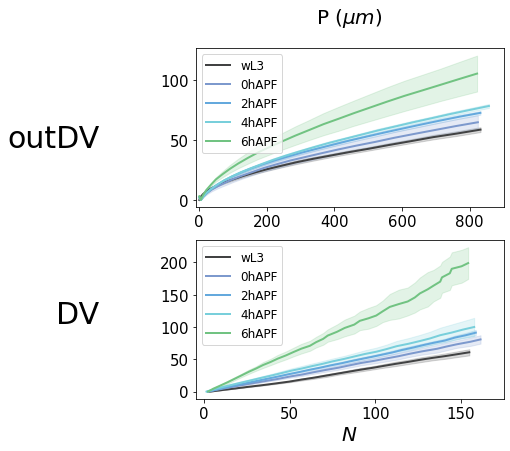

In [13]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']

#devstages = ['upcrawling']

nbcols = 1#len(devstages)
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = ''
        if (j == 0) or (nbcols == 1):
            ylabel = ''#'P ' + r'$(\mu m)$'
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            #xticks = [0, 50, 100, 150]
            #yticks = [0, 10, 20]
            #xlim = (-1, 25)
            xlim = (-5,175)
            #ylim = (-2, 27)
            title = ''
        else:
            #xticks = [0, 250, 500, 750]
            #yticks = [0, 10, 20]
            xlim = (-10,900)
            #xlim = (-1, 25)
            #ylim = (-2, 27)
            title = 'P ' + r'$(\mu m)$'#devstage
        
        ax = get_subplot(ax, df = None, #df_pool_k, 
                         stat_df = df_pool_devstage, df_cases_col='discName',
                         query_str = query_str, x_col = 'cumcount', y_col = 'k_dist_pathlength', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =2,
                         mean_label=devstage, ylabelpad = 35,
                        )
        ax.legend(fontsize = 12)
        ax.grid()
        #ax.text(x = 100, y = 10,
        #    s = "max P " + r"$(\mu m) : $" + str(max(np.round(df_pool_devstage.query(query_str)["k_dist_pathlength_mean"],2))))
        print("at stage "+ devstage + ", roi "+ roi + " max P (um) : " + str(max(np.round(df_pool_devstage.query(query_str)["k_dist_pathlength_mean"],2))))
    
    
    
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 90, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.02,)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



os.makedirs('plots/',exist_ok=True)
plt.savefig('plots/k_vs_N_' + genotype + '.pdf', bbox_inches = 'tight')


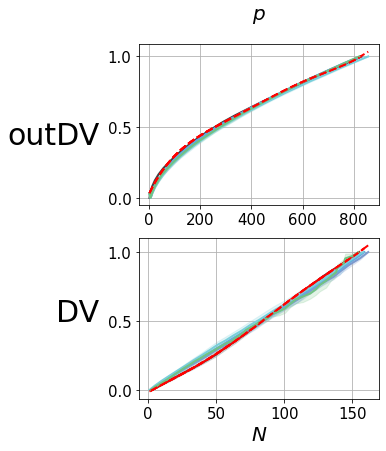

In [14]:
#devstage = "wL3"
devstage = "wL3"
nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (4.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = r'$p$'
        if (j == 0) or (nbcols == 1):
            ylabel =''
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            #xticks = [0, 50, 100, 150]
            yticks = [0, 0.5, 1]
            #xlim = (-1, 22)
            #xlim = (-5,155)
            #ylim = (-2, 27)
        else:
            #xticks = [0, 250, 500, 750]
            yticks = [0, 0.5, 1]
            #xlim = (-10,780)
            #xlim = (-1, 22)
            #ylim = (-2, 27)
        
        ax = get_subplot(ax, df = None, #df_pool_k, 
                         stat_df = df_pool_devstage, df_cases_col='discName',
                         query_str = query_str, x_col = 'cumcount', y_col = 'pathlength_scaled', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =2,
                         mean_label=devstage, ylabelpad = 0,
                        )
        
        #fit line
        df_roi_stage = df_pool_devstage.query(query_str)
        ax.plot(df_roi_stage['cumcount_mean'], df_roi_stage['ref_pathlength_scaled'], linestyle = '--', color = "red", linewidth = 2, label = 'fit')
        
    ax.grid(visible=True)
    #ax.legend(fontsize = 20)
    
fig.tight_layout()



plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 15, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



os.makedirs('plots/',exist_ok=True)
plt.savefig('plots/k_vs_N_Ref_' + genotype + '.pdf', bbox_inches = 'tight')



In [15]:

devstage = 'wL3'
roi = 'outDV'
query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
df_roi_stage = df_pool_devstage.query(query_str)
max_pathlength_outDV = max(df_roi_stage['k_dist_pathlength_mean'])

roi = 'DV'
query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
df_roi_stage = df_pool_devstage.query(query_str)
max_pathlength_DV = max(df_roi_stage['k_dist_pathlength_mean'])

max_pathlength = (max_pathlength_outDV + max_pathlength_DV)/2


print('Max pathlength at upcrawling stage')
print(max_pathlength)

Max pathlength at upcrawling stage
59.767084126366555


## Area analysis

[]

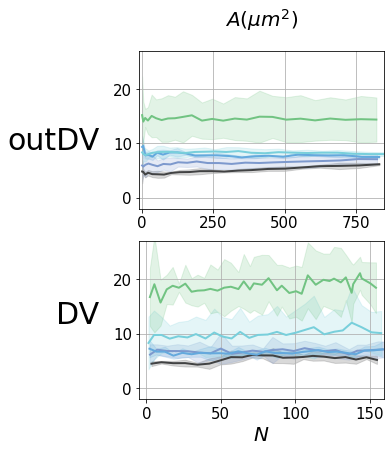

In [16]:

nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (4.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = r'$A(\mu m^2)$' 
        if (j == 0) or (nbcols == 1):
            ylabel =''
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            xticks = [0, 50, 100, 150]
            yticks = [0, 10, 20]
            xlim = (-5,160)
            ylim = (-2, 27)
        else:
            xticks = [0, 250, 500, 750,]
            yticks = [0, 10, 20]
            xlim = (-10,850)
            ylim = (-2, 27)
        
        ax = get_subplot(ax, df = None,  #df_pool_k, 
                         stat_df = df_pool_devstage, df_cases_col='discName',
                         query_str = query_str, x_col = 'cumcount', y_col = 'area', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =2,
                         mean_label=devstage, ylabelpad = 0,
                        )
        
    ax.grid(visible=True)
    #ax.legend(fontsize = 12)
    
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 15, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/k_vs_N_' + genotype + '.pdf', bbox_inches = 'tight')


In [17]:
#function to compare between pairs of stages
prop = 'area'

[area_diff, area_diff_stat] = get_prop_differences(df_pool_k, prop = prop,operation = 'divide-sqrt',
                                                   devstage_combinations=devstage_combinations, 
                                                   fit_param = 'ref_pathlength_scaled_beta_mean'
                                                  )



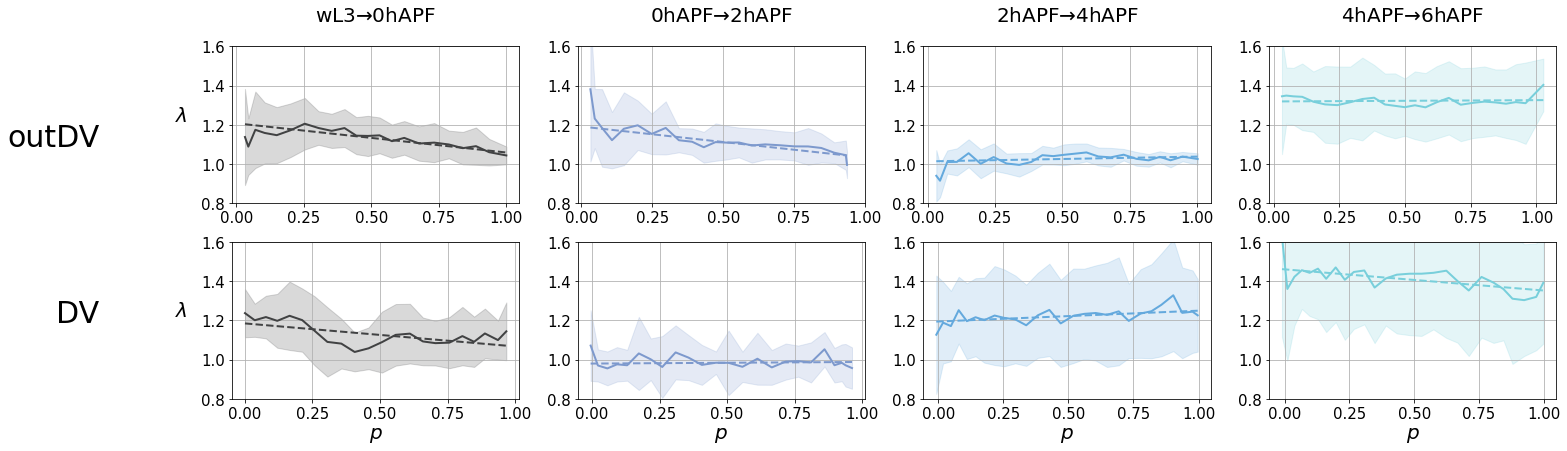

In [18]:
#plotting

nbcols = len(devstage_combinations)
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(nbcols):
        
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = devstage_init + r'$ \to $' + devstage_final
        if j == 0:
            ylabel = r'$\lambda$'
            #ylabel = ''
        if i == nbrows-1:
            xlabel = r'$p$'
        if roi == 'DV':
            xticks = [0, 0.25, 0.5, 0.75, 1]
            #yticks = [1, 1.3, 1.6] 
            #xlim = (0,155)
            ylim = (0.8, 1.6) 
        else:
            xticks = [0, 0.25, 0.5, 0.75, 1]
            #yticks = [1,1.3, 1.6]
            #xlim = (0,780)
            ylim = (0.8, 1.6)
        
        ax = get_subplot(ax, df = None, #area_diff, 
                         stat_df = area_diff_stat, query_str = query_str, x_col = 'ref_pathlength_scaled_beta', y_col = prop+'_diff', 
                         mean_color = color_dict[devstage_init], mean_linewidth= 2, mean_alpha = 0.2, #properties of the mean line
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         error_style='fill_between'
                        )

        ax = get_subplot(ax, df = None, stat_df = area_diff_stat, query_str = query_str, 
                         x_col_mean='ref_pathlength_scaled_beta_mean', y_col_mean ='fit_'+prop+'_diff',
                         xlabel = xlabel, ylabel = ylabel, title = title, ylabelpad=20,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         mean_linewidth=2,mean_color = color_dict[devstage_init], mean_linestyle='--',
                         error_style = None, mean_label = 'fit',
                        )
        
        #ax.legend()
        ax.grid(visible=True)
        
        
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, 
                    pad = 0, # if two columns
                    #pad = 30, #if four columns
                    rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



os.makedirs('plots/',exist_ok=True)
plt.savefig('plots/lambda_isotropic_' + genotype + '.pdf', bbox_inches = 'tight')


In [19]:
#make a dataframe which contains the coefficients of the fit line/polynomial for lambdas as a function of p
#this will be used in simulations
fit_lambdas_df = compile_fit_lambdas_for_sim(area_diff_stat, fit_lambdas_df = None, prop = "area", lambda_name = "lambda_isotropic_coeffs")

In [20]:
fit_lambdas_df.head()

,stage,stage_name,prop,value,stage_init,stage_final,roi
0,0,wL3 to 0hAPF,lambda_isotropic_coeffs,"[-0.14892325569073311, 1.207643610674507]",wL3,0hAPF,outDV
1,1,0hAPF to 2hAPF,lambda_isotropic_coeffs,"[-0.15780483742678553, 1.1911451878123298]",0hAPF,2hAPF,outDV
2,2,2hAPF to 4hAPF,lambda_isotropic_coeffs,"[0.024303587262111695, 1.013424597049377]",2hAPF,4hAPF,outDV
3,3,4hAPF to 6hAPF,lambda_isotropic_coeffs,"[0.006630577045139499, 1.3191404436094012]",4hAPF,6hAPF,outDV
4,0,wL3 to 0hAPF,inDV_lambda_isotropic_coeffs,"[-0.11740075492629555, 1.18465331774143]",wL3,0hAPF,DV


## Elongation analysis

[]

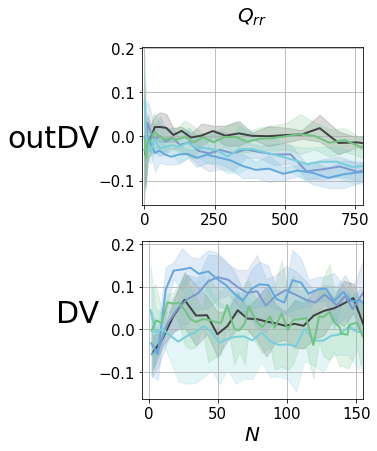

In [21]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (4.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = r'$Q_{rr}$'
        if (j == 0) or (nbcols == 1):
            ylabel = ''
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            xticks = [0, 50, 100, 150]
            #yticks = [0, 10, 20]
            xlim = (-5,155)
            #ylim = (-2, 27)
        else:
            xticks = [0, 250, 500, 750]
            #yticks = [0, 10, 20]
            xlim = (-10,780)
            #ylim = (-2, 27)
        
        ax = get_subplot(ax, df = None, #df_pool_k, 
                         stat_df = df_pool_devstage, df_cases_col='discName',
                         query_str = query_str, x_col = 'cumcount', y_col = 'Qrr_geom_inPlane', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =2,
                         mean_label=devstage, ylabelpad = 0,
                        )
        
    ax.grid(visible = True)
    #ax.legend(fontsize = 12)
    
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 100, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 20, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/k_vs_N_' + genotype + '.pdf', bbox_inches = 'tight')


[]

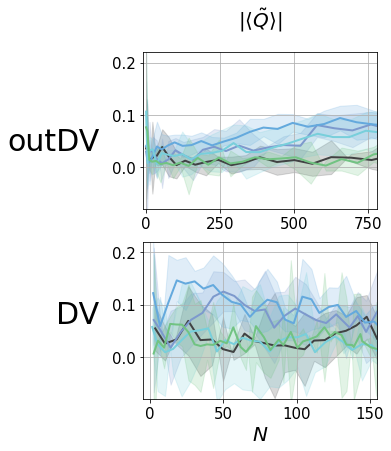

In [22]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (4.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = r'$|\langle  \tilde{Q} \rangle |$'
        if (j == 0) or (nbcols == 1):
            ylabel =''
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            xticks = [0, 50, 100, 150]
            #yticks = [0, 10, 20]
            xlim = (-5,155)
            ylim = (-0.08, 0.22)
        else:
            xticks = [0, 250, 500, 750]
            #yticks = [0, 10, 20]
            xlim = (-10,780)
            ylim = (-0.08, 0.22)
        
        ax = get_subplot(ax, df = None, #df_pool_k, 
                         stat_df = df_pool_devstage, df_cases_col='discName',
                         query_str = query_str, x_col = 'cumcount', y_col = 'Qnorm', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =2,
                         mean_label=devstage, ylabelpad = 0,
                        )
        
    ax.grid(visible = True)
    #ax.legend(fontsize = 12)
    
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 20, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/k_vs_N_' + genotype + '.pdf', bbox_inches = 'tight')


[]

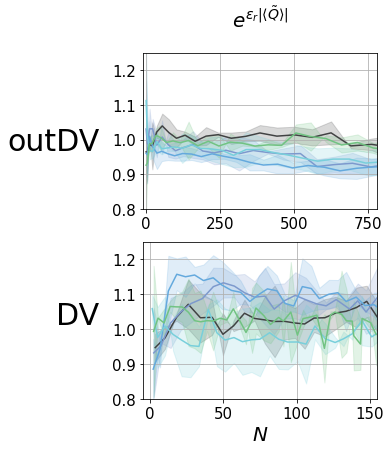

In [23]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (4.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = r'$e^{\epsilon_r|\langle  \tilde{Q} \rangle | }$'
        if (j == 0) or (nbcols == 1):
            ylabel = ''
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            xticks = [0, 50, 100, 150]
            #yticks = [0, 10, 20]
            xlim = (-5,155)
            ylim = (0.8, 1.25)
        else:
            xticks = [0, 250, 500, 750]
            #yticks = [0, 10, 20]
            xlim = (-10,780)
            ylim = (0.8, 1.25)
        
        ax = get_subplot(ax, df = None, #df_pool_k, 
                         stat_df = df_pool_devstage, df_cases_col='discName',
                         query_str = query_str, x_col = 'cumcount', y_col = 'exp_signed_Qnorm', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =1.5,
                         mean_label=devstage, ylabelpad = 0,
                        )
        
    ax.grid(visible = True)
    #ax.legend(fontsize = 12)
    
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 20, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/k_vs_N_' + genotype + '.pdf', bbox_inches = 'tight')


In [24]:

prop = 'exp_signed_Qnorm'

[el_diff, el_diff_stat] = get_prop_differences(df_pool_k, prop = prop,operation = 'divide',
                                                   devstage_combinations=devstage_combinations,
                                                   fit_param='ref_pathlength_scaled_beta_mean',
                                              )


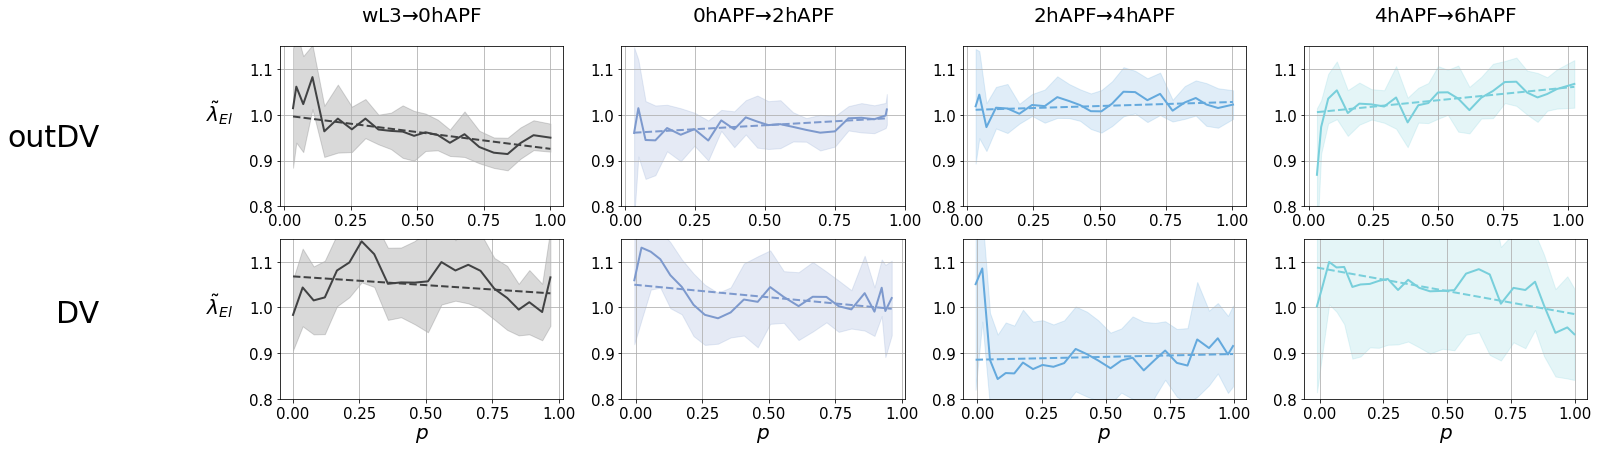

In [25]:
#plotting

nbcols = len(devstage_combinations)
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(nbcols):
        
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = devstage_init + r'$ \to $' + devstage_final
        if j == 0:
            ylabel = r'$\tilde{\lambda}_{El}$'
        if i == nbrows-1:
            xlabel = r'$p$'
        if roi == 'DV':
            xticks = [0, 0.25, 0.5, 0.75, 1]
            #yticks = [0.8,0.9,1,1.1, 1.2 ] 
            #xlim = (0,155)
            ylim = (0.8, 1.15) 
        else:
            xticks = [0, 0.25, 0.5, 0.75, 1]
            #yticks = [0.8, 0.9, 1, 1.1, 1.2]
            #xlim = (0,780)
            ylim = (0.8, 1.15)
        
        ax = get_subplot(ax, df = None, #el_diff, 
                         stat_df = el_diff_stat, query_str = query_str, x_col = 'ref_pathlength_scaled_beta', y_col = prop+'_diff', 
                         mean_color = color_dict[devstage_init], mean_linewidth= 2, mean_alpha = 0.2, #properties of the mean line
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         error_style='fill_between'
                        )

        ax = get_subplot(ax, df = None, stat_df = el_diff_stat, query_str = query_str, 
                         x_col_mean='ref_pathlength_scaled_beta_mean', y_col_mean ='fit_'+prop+'_diff',
                         xlabel = xlabel, ylabel = ylabel, title = title, ylabelpad=30,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         mean_linewidth=2,mean_color = color_dict[devstage_init], mean_linestyle='--',
                         error_style = None, mean_label = 'fit'
                        )
        
        #ax.legend()
        ax.grid()
        
        
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, 
                    pad = 50, # if two columns
                    #pad = 30, #if four columns
                    rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



os.makedirs('plots/',exist_ok=True)
plt.savefig('plots/lambda_elongation_' + genotype + '.pdf', bbox_inches = 'tight')


In [26]:
fit_lambdas_df = compile_fit_lambdas_for_sim(el_diff_stat, fit_lambdas_df = fit_lambdas_df, prop = prop, lambda_name = "lambda_Q_coeffs")

## Rearrangement analysis

In [27]:
#df = pd.read_pickle('../data/DFallDiscsIncreaselimitcounts.pkl')
#df = pd.read_pickle('../data/DFallDiscslimitcounts.pkl')
#df = df[df['genotype'] == 'ecadGFPnbG4']
#df = df[df['genotype'] == 'ecadGFPnbG4myoVI']
#genotype = 'ecadGFPnbG4myoVI'


#df = df[df['genotype'] == genotype]

#devstages = ["96hAEL","wL3","0hAPF","2hAPF","4hAPF","6hAPF",]
#rois = ['outDV', 'DV']
#df["devstage"] = [devstage_map[x] for x in df["devstage"].values]

#ref_pathlength_scaled_beta
#devstages = ['96hAEL', 'upcrawling','whitePupa','2hAPF','4hAPF','6hAPF']

[k_N_alldiscs, k_N_mean] = analyze_ring_cell_numbers(df, devstages = devstages)


[k_diff, k_diff_stat] = get_k_differences(k_N_alldiscs, devstage_combinations = devstage_combinations, rois = rois, fit_param = 'ref_pathlength_scaled_beta_mean', N_ref_pathlength_dict = k_scaled_dist_dict)

#k_diff["ref_pathlength_scaled_beta"] = k_diff.apply(lambda row: k_scaled_dist_dict[row['roi']](row["N_beta"]),axis = 1)
#k_diff_stat["ref_pathlength_scaled_beta"] = k_diff_stat.apply(lambda row: k_scaled_dist_dict[row['roi']](row['N_beta_mean']),axis = 1)


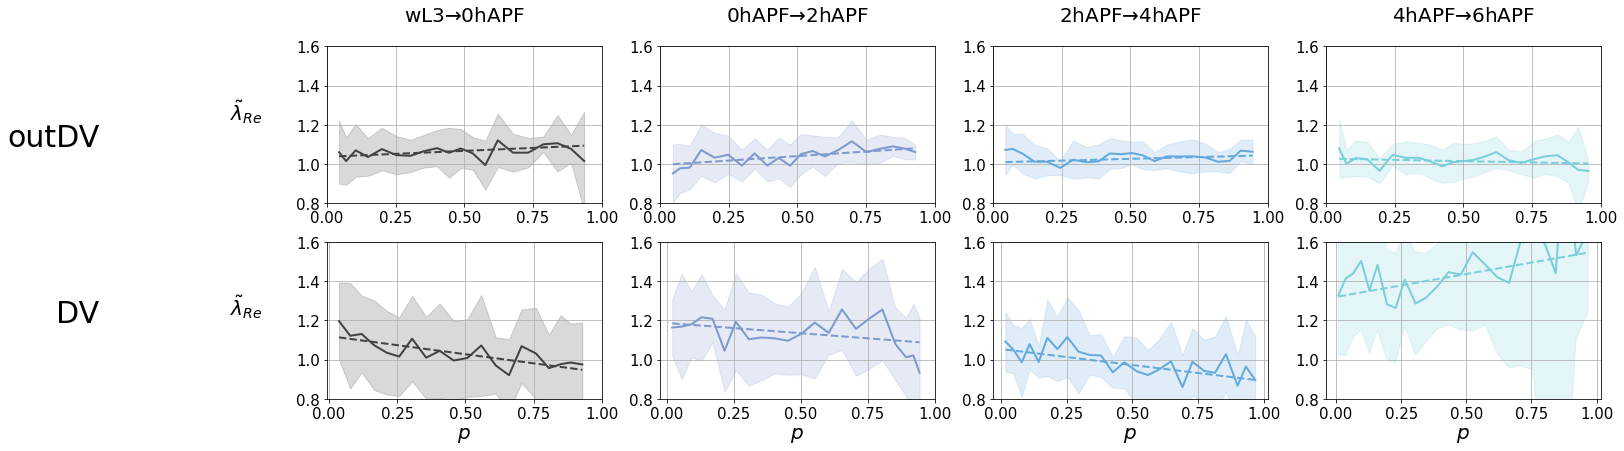

In [28]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = len(devstage_combinations)
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(nbcols):
        
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = devstage_init + r'$ \to $' + devstage_final
        if j == 0:
            ylabel = r'$\tilde{\lambda}_{Re}$'
        if i == nbrows-1:
            xlabel = r'$p$'
        if roi == 'DV':
            xticks = [0, 0.25, 0.5, 0.75, 1]
            #yticks = [1, 1.5, 2.0] 
            #xlim = (0,155)
            ylim = (0.8, 1.6) 
        else:
            xticks = [0, 0.25, 0.5, 0.75, 1]
            #yticks = [1, 1.2, 1.4,]
            #xlim = (0,780)
            ylim = (0.8, 1.6)
        
        ax = get_subplot(ax, df = None,#k_diff, 
                         stat_df=k_diff_stat, query_str = query_str, x_col = 'ref_pathlength_scaled_beta_mean', y_col = 'lambda_rearrangement', 
                         mean_color=color_dict[devstage_init], mean_linewidth=2,
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                        )
        ax = get_subplot(ax, df = None, 
                         stat_df = k_diff_stat, query_str = query_str, 
                         x_col_mean='ref_pathlength_scaled_beta_mean', y_col_mean ='fit_lambda_rearrangement',
                         mean_color=color_dict[devstage_init], mean_linewidth=2,
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         mean_linestyle='--',error_style = None, mean_label = 'fit'
                        )
        #ax.legend()
        ax.grid()
        
        
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, 
                    pad = 100, # if two columns
                    #pad = 30, #if four columns
                    rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



os.makedirs('plots/',exist_ok=True)
plt.savefig('plots/lambda_rearrangement_' + genotype + '.pdf', bbox_inches = 'tight')

In [29]:
prop = "lambda_rearrangement"
fit_lambdas_df = compile_fit_lambdas_for_sim(k_diff_stat, fit_lambdas_df = fit_lambdas_df, prop = prop, lambda_name = "lambda_rearrangement_coeffs")

## Getting anisotropic lambda as product of elongation and rearrangement

In [30]:
#merge k_diff and el_diff
k_diff_w_aniso = pd.merge(k_diff, el_diff[["disc_combination", "k_beta", "exp_signed_Qnorm_diff"]], on = ["disc_combination", "k_beta"])
#multiply the two lambdas
k_diff_w_aniso["lambda_anisotropic"] = k_diff_w_aniso["lambda_rearrangement"]*k_diff_w_aniso["exp_signed_Qnorm_diff"]
#get mean and std
#group by roi, devstage_init, devstage_final, k_beta
groupby_cols = ["roi", "devstage_init", "devstage_final", "k_beta"]
k_diff_w_aniso_stat = k_diff_w_aniso.groupby(groupby_cols).agg(["mean", "std"]).reset_index()
colnames = [x[0] if (x[0] in groupby_cols) else x[0]+'_'+x[1] for x in k_diff_w_aniso_stat.columns]
k_diff_w_aniso_stat.columns = colnames #removing multi-indexing
#fit straight lines
#group by roi, devstage_init, devstage_final
groupby_cols = ["roi", "devstage_init", "devstage_final"]
def func_to_fit(col, fit_param = "ref_pathlength_scaled_beta_mean", weight_col = 'lambda_anisotropic_std', fit_deg = 1):
    #weight_col = 'lambda_anisotropic_std'
    #exclude boundary values
    ind = col.index[1:-1]
    coeffs = np.polyfit(k_diff_w_aniso_stat.loc[ind, fit_param], col.loc[ind], 
                        w = 1/k_diff_w_aniso_stat.loc[ind, weight_col], 
                        deg = fit_deg
                       )
    return([coeffs]*len(col))
fit_param = "ref_pathlength_scaled_beta_mean"
k_diff_w_aniso_stat["fit_lambda_anisotropic_coeffs"] = k_diff_w_aniso_stat.groupby(groupby_cols)["lambda_anisotropic_mean"].transform(func_to_fit, fit_param = fit_param)
#get value of lambda from the fit polynomial
k_diff_w_aniso_stat['fit_lambda_anisotropic'] = k_diff_w_aniso_stat.apply(lambda row: np.poly1d(row["fit_lambda_anisotropic_coeffs"])(row[fit_param]) ,axis = 1)


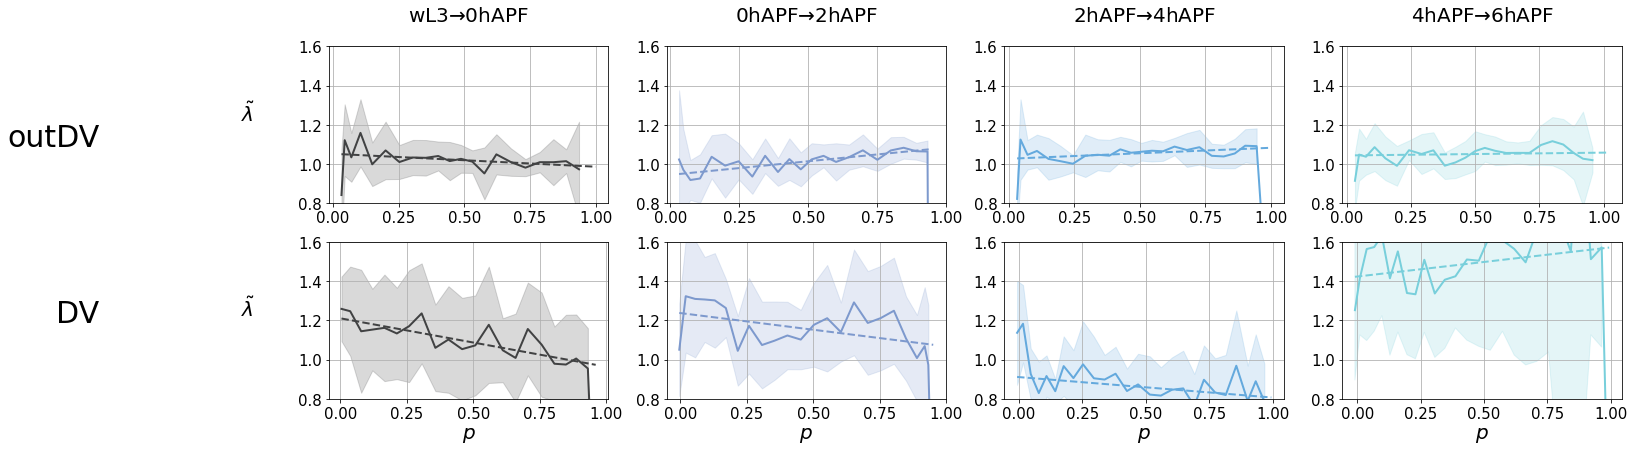

In [31]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = len(devstage_combinations)
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(nbcols):
        
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = devstage_init + r'$ \to $' + devstage_final
        if j == 0:
            ylabel = r'$\tilde{\lambda}$'
        if i == nbrows-1:
            xlabel = r'$p$'
        if roi == 'DV':
            xticks = [0, 0.25, 0.5, 0.75, 1]
            #yticks = [1, 1.5, 2.0] 
            #xlim = (0,155)
            ylim = (0.8, 1.6) 
        else:
            xticks = [0, 0.25, 0.5, 0.75, 1]
            #yticks = [1, 1.2, 1.4,]
            #xlim = (0,780)
            ylim = (0.8, 1.6)
        
        ax = get_subplot(ax, df = None,#k_diff, 
                         stat_df=k_diff_w_aniso_stat, query_str = query_str, x_col = 'ref_pathlength_scaled_beta_mean', y_col = 'lambda_anisotropic', 
                         mean_color=color_dict[devstage_init], mean_linewidth=2,
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                        )
        ax = get_subplot(ax, df = None, 
                         stat_df = k_diff_w_aniso_stat, query_str = query_str, 
                         x_col_mean='ref_pathlength_scaled_beta_mean', y_col_mean ='fit_lambda_anisotropic',
                         mean_color=color_dict[devstage_init], mean_linewidth=2,
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         mean_linestyle='--',error_style = None, mean_label = 'fit'
                        )
        #ax.legend()
        ax.grid()
        
        
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, 
                    pad = 100, # if two columns
                    #pad = 30, #if four columns
                    rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



os.makedirs('plots/',exist_ok=True)
plt.savefig('plots/lambda_anisotropic_' + genotype + '.pdf', bbox_inches = 'tight')

In [32]:
prop = "lambda_anisotropic"
fit_lambdas_df = compile_fit_lambdas_for_sim(k_diff_w_aniso_stat, fit_lambdas_df = fit_lambdas_df, prop = prop, lambda_name = "lambda_anisotropic_coeffs")

### Height analysis

In [33]:
#There are four different files with the data

df_names = ["../data/height_volume/ecadGFPnbG4HeightVolumneTrunkated-acrossDV.pkl",
            "../data/height_volume/ecadGFPnbG4HeightVolumneTrunkated-alongDV.pkl",
            "../data/height_volume/ecadGFPnbG4myoVIHeightVolumneTrunkated-acrossDV.pkl",
            "../data/height_volume/ecadGFPnbG4myoVIHeightVolumneTrunkated-alongDV.pkl"
           ]
#combine all files into a single dataframe
df_Height = pd.DataFrame()
for df_name in df_names:
    df_Height = pd.concat([df_Height, pd.read_pickle(df_name)])

devstage_map = {
                "96hAEL":"96hAEL",
                "120hAEL":"120hAEL",
                "upcrawling":"wL3",
                "whitePupa":"0hAPF",
                "2hAPF":"2hAPF",
                "4hAPF":"4hAPF",
                "6hAPF":"6hAPF",
               }
df_Height["devstage"] = [devstage_map[x] for x in df_Height["devstage"].values]
df_Height = df_Height.rename(columns={"disc": "discName"})
df_Height = df_Height[df_Height['genotype'] == genotype]
df = df_Height
df.head()

,genotype,devstage,discName,region,k_dist,cell_id,k_dist_pathlength,area,linelength,height,volume,distanceFraction,k_fromDV,roi
0,ecadGFPnbG4,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8,outDV,13,10439,26.362206,2.606868,26.0,24.4,63.607569,0.820286,NaN,NaN
1,ecadGFPnbG4,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8,outDV,13,10439,26.362206,2.606868,26.0,24.5,63.868255,0.820286,NaN,NaN
2,ecadGFPnbG4,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8,outDV,13,10439,26.362206,2.606868,26.0,22.5,58.654520,0.820286,NaN,NaN
3,ecadGFPnbG4,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8,outDV,13,11563,26.416047,1.512509,26.0,24.4,36.905231,0.821961,NaN,NaN
4,ecadGFPnbG4,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8,outDV,13,11563,26.416047,1.512509,26.0,24.5,37.056482,0.821961,NaN,NaN


In [34]:
groupby_cols = ['devstage', 'region', 'discName', 'k_dist']
#here we pool cells within a ring and calculate the mean and std
df_pool_k = df.groupby(groupby_cols).agg('mean').reset_index() 
#we offset k_dist values if the rings do not start with k_dits = 0
k_dist_offset = df.groupby(['discName']).k_dist.agg('min')#.reset_index().set_index('discName') #some discs can have k starting from non-zero value, so we offset them by the starting k
#df_pool_k['k_dist'] = df_pool_k['k_dist'] - k_dist_offset[df_pool_k['discName'].values].values #offsetting k values


#scale pathlength
pathlength_max = df_pool_k.groupby(['discName']).k_dist_pathlength.agg('max')
df_pool_k['pathlength_scaled'] = df_pool_k['k_dist_pathlength']/pathlength_max[df_pool_k['discName'].values].values

In [35]:
groupby_cols = ['devstage', 'region', 'k_dist']
#here we pool discs within a devstage and calculate the mean and std
df_pool_devstage = df_pool_k.groupby(groupby_cols).agg(['mean', 'std']).reset_index()
colnames = [x[0]+'_'+x[1] if x[0] not in groupby_cols else x[0] for x in df_pool_devstage.columns]
df_pool_devstage.columns = colnames #removing multi-indexing

df_pool_devstage.head()

,devstage,region,k_dist,cell_id_mean,cell_id_std,k_dist_pathlength_mean,k_dist_pathlength_std,area_mean,area_std,linelength_mean,...,height_mean,height_std,volume_mean,volume_std,distanceFraction_mean,distanceFraction_std,k_fromDV_mean,k_fromDV_std,pathlength_scaled_mean,pathlength_scaled_std
0,0hAPF,DV,0,10575.842857,242.062470,0.000000,0.000000,6.138776,1.899830,0.000000,...,35.728751,3.450837,214.481586,52.654957,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,0hAPF,DV,1,10613.352387,110.687154,2.740585,0.197002,7.049269,0.976519,2.771303,...,35.664722,3.429032,249.595224,27.747053,0.032621,0.001879,0.0,0.0,0.035095,0.001250
2,0hAPF,DV,2,10534.355983,141.625504,5.952463,0.394122,6.803410,0.972501,5.927690,...,35.571150,3.465918,239.662778,19.986769,0.070965,0.005600,0.0,0.0,0.076312,0.004181
3,0hAPF,DV,3,10515.141896,132.495449,9.463610,0.746017,6.795584,1.264079,9.442669,...,35.660233,3.568059,239.837254,31.293652,0.112913,0.011232,0.0,0.0,0.121321,0.008412
4,0hAPF,DV,4,10571.566821,150.008576,12.758039,1.085376,6.757545,1.057610,12.749598,...,35.542429,3.593406,238.444880,30.935569,0.152149,0.014992,0.0,0.0,0.163503,0.011652


[]

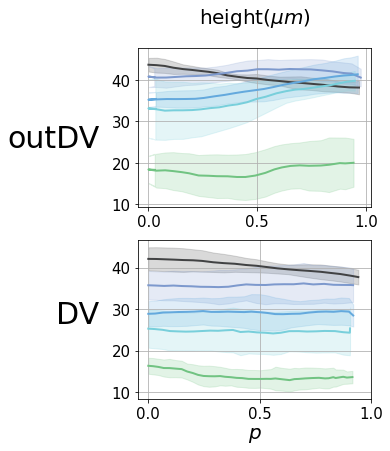

In [36]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']
devstages = ["wL3","0hAPF","2hAPF","4hAPF","6hAPF",]

nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (4.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = 'height' + r'$(\mu m)$' 
        if (j == 0) or (nbcols == 1):
            ylabel =''
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$p$'
        if roi == 'DV':
            xticks = [0, 0.5, 1]
            #yticks = [0, 10, 20]
            #xlim = (0,1)
            #ylim = (-2, 27)
        else:
            xticks = [0, 0.5, 1]
            #yticks = [0, 10, 20]
            #xlim = (0,1)
            #ylim = (-2, 27)
        
        ax = get_subplot(ax, df = None,  #df_pool_k, 
                         stat_df = df_pool_devstage, df_cases_col='discName',
                         query_str = query_str, x_col = 'distanceFraction', y_col = 'height', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =2,
                         mean_label=devstage, ylabelpad = 0,
                        )
        
    ax.grid(visible=True)
    #ax.legend(fontsize = 12)
    
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 15, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/k_vs_N.pdf', bbox_inches = 'tight')


In [37]:

prop = 'height'

[height_diff, height_diff_stat] = get_prop_diff_vs_dist(df_pool_k, prop = prop,operation = 'divide',
                                                   devstage_combinations=devstage_combinations, fit_deg=2
                                              )


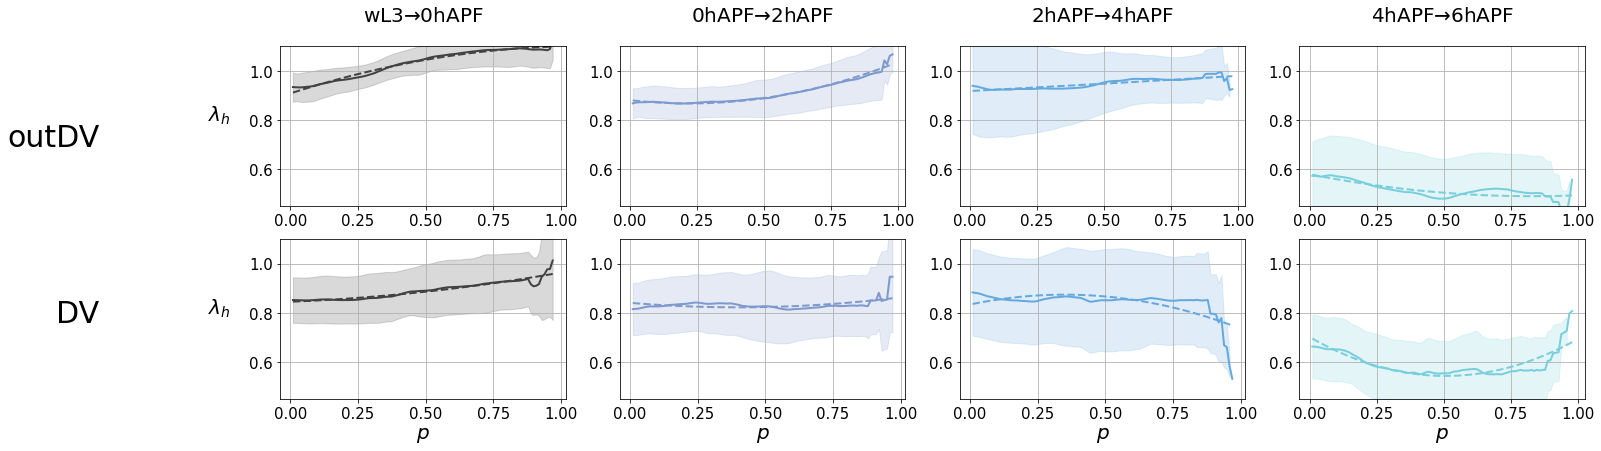

In [38]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = len(devstage_combinations)
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(nbcols):
        
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = devstage_init + r'$ \to $' + devstage_final
        if j == 0:
            ylabel = r'$\lambda_{h}$'
        if i == nbrows-1:
            xlabel = r'$p$'
        if roi == 'DV':
            xticks = [0, 0.25, 0.5, 0.75, 1]
            #yticks = [0.8,0.9,1,1.1, 1.2 ] 
            #xlim = (0,155)
            ylim = (0.45, 1.1) 
        else:
            xticks = [0, 0.25, 0.5, 0.75, 1]
            #yticks = [0.8, 0.9, 1, 1.1, 1.2]
            #xlim = (0,780)
            ylim = (0.45, 1.1)
        
        ax = get_subplot(ax, df = None, #el_diff, 
                         stat_df = height_diff_stat, query_str = query_str, x_col = 'dist_beta', y_col = prop+'_diff', 
                         mean_color = color_dict[devstage_init], mean_linewidth= 2, mean_alpha = 0.2, #properties of the mean line
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         error_style='fill_between'
                        )

        ax = get_subplot(ax, df = None, stat_df = height_diff_stat, query_str = query_str, 
                         x_col_mean='dist_beta', y_col_mean ='fit_'+prop+'_diff',
                         xlabel = xlabel, ylabel = ylabel, title = title, ylabelpad=30,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         mean_linewidth=2,mean_color = color_dict[devstage_init], mean_linestyle='--',
                         error_style = None, mean_label = 'fit'
                        )
        
        #ax.legend()
        ax.grid()
        
        
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, 
                    pad = 50, # if two columns
                    #pad = 30, #if four columns
                    rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



os.makedirs('plots/',exist_ok=True)
plt.savefig('plots/lambda_height_' + genotype + '.pdf', bbox_inches = 'tight')


In [39]:
prop = "height"
fit_lambdas_df = compile_fit_lambdas_for_sim(height_diff_stat, fit_lambdas_df = fit_lambdas_df, prop = prop, lambda_name = "lambda_height_coeffs")

In [40]:
#save the fit_lambdas_df
os.makedirs('fit_lambda_files/',exist_ok=True)
pickle.dump(fit_lambdas_df, open("fit_lambda_files/fit_lambdas_df_"+genotype+".pkl", 'wb'))
fit_lambdas_df.to_csv("fit_lambda_files/fit_lambdas_df_"+genotype+".csv", index=False)

In [41]:
fit_lambdas_df

,stage,stage_name,prop,value,stage_init,stage_final,roi
0,0,wL3 to 0hAPF,lambda_isotropic_coeffs,"[-0.14892325569073311, 1.207643610674507]",wL3,0hAPF,outDV
1,1,0hAPF to 2hAPF,lambda_isotropic_coeffs,"[-0.15780483742678553, 1.1911451878123298]",0hAPF,2hAPF,outDV
2,2,2hAPF to 4hAPF,lambda_isotropic_coeffs,"[0.024303587262111695, 1.013424597049377]",2hAPF,4hAPF,outDV
3,3,4hAPF to 6hAPF,lambda_isotropic_coeffs,"[0.006630577045139499, 1.3191404436094012]",4hAPF,6hAPF,outDV
4,0,wL3 to 0hAPF,inDV_lambda_isotropic_coeffs,"[-0.11740075492629555, 1.18465331774143]",wL3,0hAPF,DV
5,1,0hAPF to 2hAPF,inDV_lambda_isotropic_coeffs,"[0.008205005268704022, 0.9797702620487156]",0hAPF,2hAPF,DV
6,2,2hAPF to 4hAPF,inDV_lambda_isotropic_coeffs,"[0.055297012797719834, 1.1943382890327128]",2hAPF,4hAPF,DV
7,3,4hAPF to 6hAPF,inDV_lambda_isotropic_coeffs,"[-0.10783304202168652, 1.4603859739712965]",4hAPF,6hAPF,DV
8,0,wL3 to 0hAPF,lambda_Q_coeffs,"[-0.0732924218365131, 0.9989464752106799]",wL3,0hAPF,outDV
9,1,0hAPF to 2hAPF,lambda_Q_coeffs,"[0.03479742700198853, 0.9598841478843432]",0hAPF,2hAPF,outDV
